# Trabalho do Curso de Extensão do Integra School
Nome: Incêndios Florestais no Brasil

Professor: Carlos Artur Guimarães



1.   Problemática

Relátorio sobre índice de incêndios Florestais ocorridos no Brasil. Pretendo com essa pesquisa mostrar dados e fazer correlações entre acontecimentos, dessa forma criar um alerta na qual visa a proteção da floresta brasileira.
2.   O que é

Relatório sobre a quantidade de incêndios Florestais ocorridos no Brasil
3.   Fonte dos Dados:

  [Kaggle](https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil)

  [DN](https://www.dn.pt/lusa/incendios-um-dos-maiores-fogos-queimou-41-mil-hectares-em-2003-8577610.html)

  [UOL](https://escolakids.uol.com.br/ciencias/estacoes-do-ano.htm)

4.   ONU 2030 área e objetivo:

Biosfera | Saúde e Bem-Estar(3), Ação Contra a Mudança Global do Clima(13), Vida na Água(14) & Vida Terrestre(15).

#*BIBLIOTECAS*

In [337]:
#Bibliotecas que serão utilizadas:

#Biblioteca para gerir sequencias de dados
import numpy as np

#Biblioteca para criar/editar planilhas de dados
import pandas as pd

#Biblioteca para plotagem de gráficos
import matplotlib.pyplot as plt

#Biblioteca para plotagem de gráficos
import seaborn as sns

#*INPUT DE DADOS*

In [338]:
#Recebendo e lendo o arquivo "CSV" direto do repositorio do "Github"
dados = pd.read_csv('https://raw.githubusercontent.com/Julio-CSilva/IPP-IntegraSchool.2/main/Dados/amazon.csv', sep = ',', header=[0], )

#sep (definindo que a separação das colunas é demarcada por ',')
#header (define que o cabeçalho é definido como sendo a linha '0')


#Mudando os títulos das colunas:
dados.columns = ['Ano', 'Estado', 'Mês', 'N_Queimadas', 'Data']

#Mudando o nome Rio -> Rio de Janeiro
dados = dados.replace({'Estado': {'Rio': np.nan}})
dados['Estado'].fillna('Rio de Janeiro', inplace=True)

#Configuração GERAL de tamanho para todos os gráficos
plt.rcParams['figure.figsize'] = (18,8)

#Lendo as 1000 primeiras linhas do arquivo
dados.head(1000)

,Ano,Estado,Mês,N_Queimadas,Data
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
995,2016,Bahia,Fevereiro,418.0,2016-01-01
996,2017,Bahia,Fevereiro,100.0,2017-01-01
997,1998,Bahia,Março,0.0,1998-01-01
998,1999,Bahia,Março,83.0,1999-01-01


#*DADOS ESTATÍSTICOS*

In [339]:
#Entre os anos de 1998 á 2017, tivemos a seguinte média de relatos de incêndios por MÊS

queimadas_totais_mes = (dados['N_Queimadas'].sum())/12
print("A Média de Relatos de Incêndios Florestais entre os anos de 1998 e 2017 a cada mês é de: ", queimadas_totais_mes, " Casos")

A Média de Relatos de Incêndios Florestais entre os anos de 1998 e 2017 a cada mês é de:  58243.67275  Casos


#*NÚMERO DE QUEIMADAS POR ESTADO*

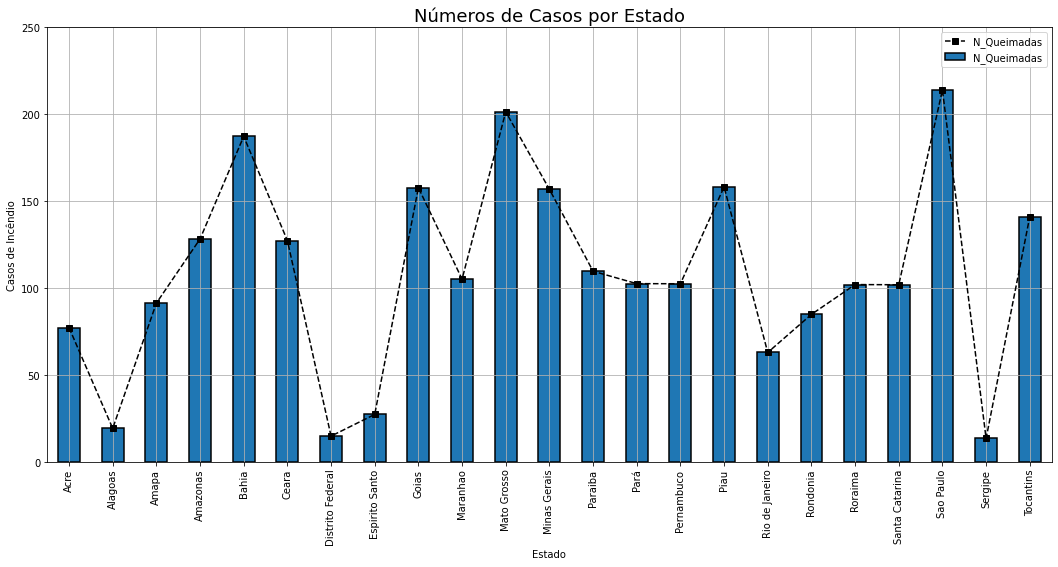

In [340]:
queimadas_estado = dados.groupby('Estado') ['N_Queimadas'].mean()

queimadas_estado.plot(linestyle='--', color='black', marker='s')
queimadas_estado.plot.bar(edgecolor='black', grid=True, linewidth=1.5)

plt.ylim(0, 250)
plt.ylabel('Casos de Incêndio')
plt.title('Números de Casos por Estado', fontsize = 18)
plt.legend(loc='best')

plt.show()

#*NÚMERO DE QUEIMADAS POR ANO*

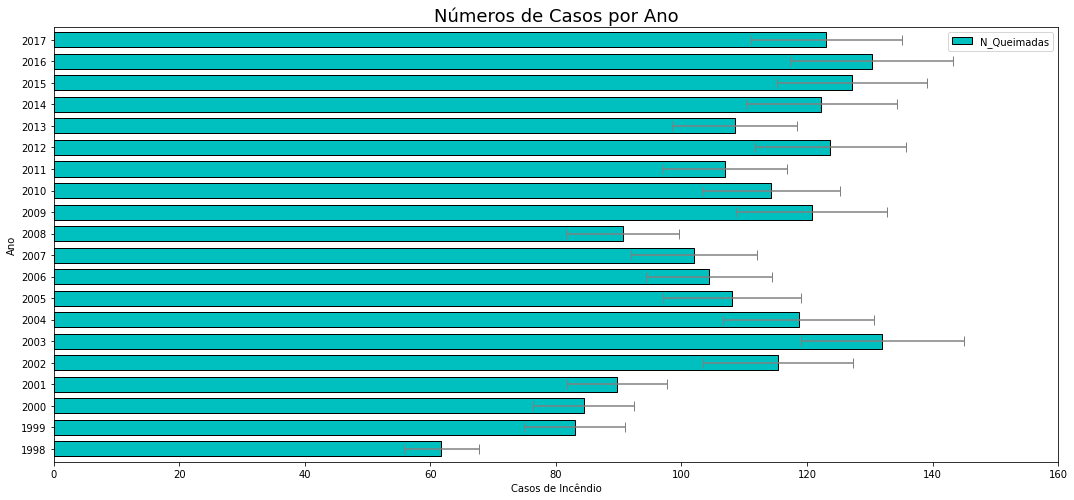

In [341]:
queimadas_ano = dados.groupby('Ano') ['N_Queimadas'].mean()

m_e = [6,8,8,8,12,13,12,11,10,10,9,12,11,10,12,10,12,12,13,12]

queimadas_ano.plot.barh(edgecolor='black', color='c', width=0.7, xerr=m_e, capsize=5, ecolor='gray')

plt.xlim(0, 160)
plt.title('Números de Casos por Ano', fontsize= 18)
plt.xlabel('Casos de Incêndio')
plt.legend()


plt.show()

## Incêndios: Um dos maiores fogos queimou 41 mil hectares em 2003
Nesse gráfico fica claro a visualização dos picos de caso em 2003, nessa data com base nos relatórios disponiblizados pelo Instituto de Conservação da Natureza e Florestas (ICNF) o incêndio teve como causa o "Incendiarismo", de forma voluntária, nesse mesmo ano aconteceram outros 14 incêndios florestais de grandes dimensôes, ou seja, com mais de 100 hectares. 

#*NÚMERO DE QUEIMADAS POR MÊS*

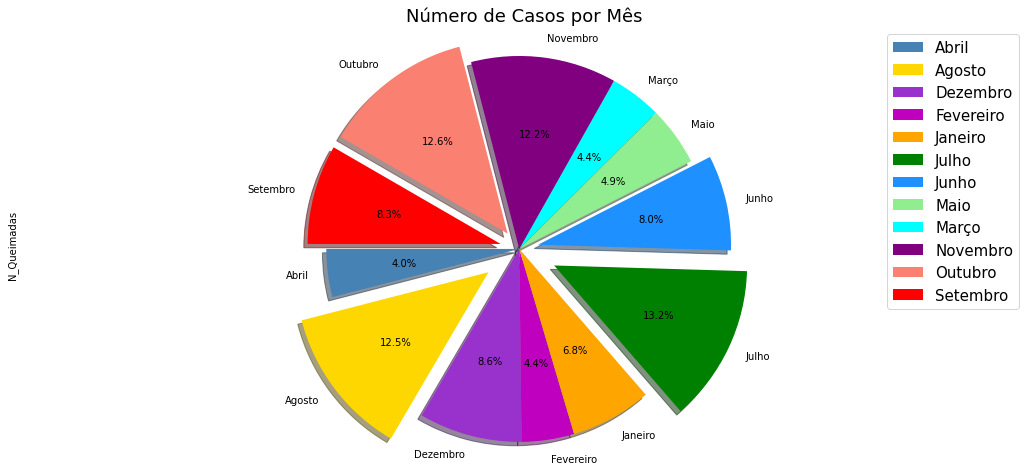

In [342]:
queimadas_mes = dados.groupby('Mês') ['N_Queimadas'].mean()

explode = (0, 0.2, 0, 0, 0, 0.2, 0.1, 0, 0, 0, 0.1, 0.1)
cores = ['steelblue', 'Gold', 'darkorchid', 'm', 'orange', 'G', 'Dodgerblue', 'lightgreen', 'cyan', 'purple', 'Salmon', 'r']

queimadas_mes.plot.pie(explode=explode, shadow=True, autopct='%1.1f%%', startangle=180, colors=cores)

plt.title('Número de Casos por Mês', fontsize=18)
plt.legend(fontsize=15)
plt.axis('equal')

plt.show()

## Estações do ano

Note que os meses: Julho, Junho, Agosto, Setembro e Outubro cominam com o período de verão, o que acarretam o aumento de focos de incêndios, amplificando os índices de reportes.